# MOBILENET

In [1]:
import keras

Using TensorFlow backend.


In [2]:
import numpy as np
from keras import backend as k
from keras.layers.core import Dense
from keras.optimizers import adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mobile = keras.applications.mobilenet.MobileNet()

In [4]:
def prepare_image(file):
    img_path = 'Data/'
    img = image.load_img(img_path + file ,target_size=(224,224))
    img_array =image.img_to_array(img)
    img_array_expanded_dims =np.expand_dims(img_array,axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)


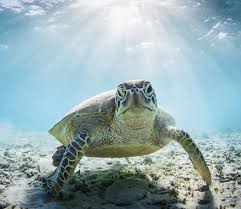

In [5]:
from IPython.display import Image
Image(filename='Data/test1.jpeg')

In [6]:
preprocessed_image = prepare_image('test1.jpeg')
predictions =mobile.predict(preprocessed_image)
result=imagenet_utils.decode_predictions(predictions)
result

[[('n01664065', 'loggerhead', 0.6489132),
  ('n01667778', 'terrapin', 0.32815835),
  ('n01665541', 'leatherback_turtle', 0.019288111),
  ('n01667114', 'mud_turtle', 0.0013446992),
  ('n01695060', 'Komodo_dragon', 0.0009666966)]]

# MobileNet Fine-Tune (Transfer Learning)

In [11]:
train_path = '/home/vijay/Desktop/Dataworld/github/keras/Data/BloodCells/images/TRAIN'
test_path = '/home/vijay/Desktop/Dataworld/github/keras/Data/BloodCells/images/TEST'
valid_path = '/home/vijay/Desktop/Dataworld/github/keras/Data/BloodCells/images/TEST_SIMPLE'

In [12]:
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
train_path, target_size=(224,224),batch_size=10)

Found 9957 images belonging to 4 classes.


In [16]:
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
test_path, target_size=(224,224),batch_size=10,shuffle= False)

Found 2487 images belonging to 4 classes.


In [14]:
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
valid_path, target_size=(224,224),batch_size=10)

Found 71 images belonging to 4 classes.


# Modify Model

In [15]:
mobile.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 114, 114, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
__________

In [17]:
x= mobile.layers[-6].output
predictions = Dense(4,activation='softmax')(x)
model = Model(inputs=mobile.input,outputs=predictions)

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 114, 114, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
__________

In [19]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [20]:
model.compile(adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.fit_generator(train_batches,steps_per_epoch=50,validation_data=valid_batches,epochs=100,verbose=2)

Epoch 1/100
 - 19s - loss: 0.0676 - acc: 0.9860 - val_loss: 1.5496 - val_acc: 0.4085
Epoch 2/100
 - 19s - loss: 0.0635 - acc: 0.9820 - val_loss: 1.5384 - val_acc: 0.3099
Epoch 3/100
 - 19s - loss: 0.0604 - acc: 0.9900 - val_loss: 1.0415 - val_acc: 0.7183
Epoch 4/100
 - 18s - loss: 0.1025 - acc: 0.9700 - val_loss: 1.7325 - val_acc: 0.2676
Epoch 5/100
 - 18s - loss: 0.0872 - acc: 0.9720 - val_loss: 1.9753 - val_acc: 0.2817
Epoch 6/100
 - 18s - loss: 0.0970 - acc: 0.9640 - val_loss: 1.0751 - val_acc: 0.7042
Epoch 7/100
 - 18s - loss: 0.0803 - acc: 0.9760 - val_loss: 1.5283 - val_acc: 0.2817
Epoch 8/100
 - 18s - loss: 0.0963 - acc: 0.9780 - val_loss: 1.9241 - val_acc: 0.2535
Epoch 9/100
 - 18s - loss: 0.0621 - acc: 0.9860 - val_loss: 1.6280 - val_acc: 0.4225
Epoch 10/100
 - 18s - loss: 0.0674 - acc: 0.9780 - val_loss: 1.7443 - val_acc: 0.3099
Epoch 11/100
 - 18s - loss: 0.0613 - acc: 0.9900 - val_loss: 1.2317 - val_acc: 0.5915
Epoch 12/100
 - 18s - loss: 0.0673 - acc: 0.9900 - val_loss: 1.

Epoch 97/100
 - 19s - loss: 0.0183 - acc: 0.9940 - val_loss: 1.9891 - val_acc: 0.3099
Epoch 98/100
 - 19s - loss: 0.0096 - acc: 1.0000 - val_loss: 1.1781 - val_acc: 0.5915
Epoch 99/100
 - 19s - loss: 0.0412 - acc: 0.9840 - val_loss: 1.1024 - val_acc: 0.6620
Epoch 100/100
 - 19s - loss: 0.0197 - acc: 0.9940 - val_loss: 1.1307 - val_acc: 0.6620


In [23]:
test_lables=test_batches.classes

In [25]:
predictions = model.predict_generator(test_batches)

In [26]:
cm= confusion_matrix(test_lables,predictions.argmax(axis=1))

In [27]:
test_batches.class_indices

{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[313  20   0 290]
 [ 74 455   0  91]
 [ 37   0  19 564]
 [132  25   0 467]]


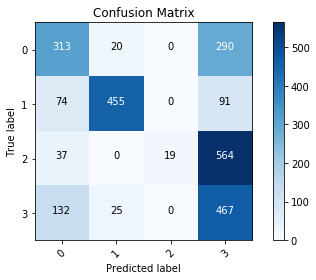

In [29]:
cm_plot_lables = ['0','1','2','3']
plot_confusion_matrix(cm,cm_plot_lables,title='Confusion Matrix')

# Saving model as h5

In [31]:
from keras.models import model_from_json

model_json = model.to_json()
with open("bloodcells.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("bloodcells.h5")
print("Saved model to disk")

Saved model to disk


# Load model

In [35]:
# load weights into new model
model.load_weights("bloodcells.h5")
print("Loaded model from disk")

Loaded model from disk
